In [10]:
#kütüphaneler yüklenir
import skimage, os
from skimage import data, exposure, img_as_float, io
import skimage.exposure as ex 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math

In [11]:
def plotImgAndHistEq(img, bins=256):
    
    ch = ex.equalize_hist(img, bins)
    #eşitlenmiş görüntüyü orijinal görüntünün yanına yerleştirir
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(6, 6))

   #orijinal ve eşitlenmiş görüntüyü gösterir
    ax[0, 0].imshow(img, cmap = 'gray')
    ax[0, 0].set_title('Low contrast image')
    ax[0, 1].imshow(ch, cmap = 'gray')
    ax[0, 1].set_title('Histogram equalization')

    #görüntünün histogramlarını istenen sayıda bölme ile görüntüler
    h1 = ax[1, 0].hist(img.ravel(), bins)
    h2 = ax[1, 1].hist(ch.flatten(), bins)


In [12]:
def plotImgHistCDF(im1, im2):
    '''
    Görüntüleri, histogramlarını, CDF (kümülatif histogram) ile kaplanmış olarak çizer
    '''
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 5)) #figsize görüntülerin göreli boyutunu kontrol eder

    ax[0, 0].imshow(im1, cmap=plt.cm.gray)
    ax[0, 1].hist(im1.flatten(),bins=256) 
    ax[1, 0].imshow(im2, cmap=plt.cm.gray)
    ax[1, 1].hist(im2.flatten(),bins=256)

    #Histogramların üzerine cdf'yi yerleştirir
    ax_cdf = ax[0, 1].twinx()
    im1_cdf, bins = ex.cumulative_distribution(im1, nbins=256)
    ax_cdf.plot(bins, im1_cdf, 'r')

    ax_cdf = ax[1, 1].twinx()
    im2_cdf, bins = ex.cumulative_distribution(im2, nbins=256)
    ax_cdf.plot(bins, im2_cdf, 'r')

    fig.tight_layout()
    plt.show()

C:\Users\pc\anaconda3\envs\env\lib\site-packages\skimage\exposure\exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)
C:\Users\pc\anaconda3\envs\env\lib\site-packages\skimage\exposure\exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


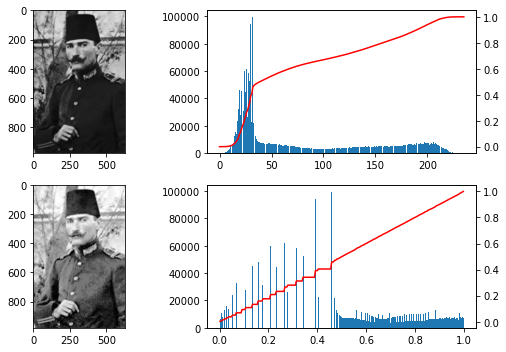

In [13]:
#Atatürk görüntüsüne histogram eşitleme uygulanır. 
#ve kümülatif histogramı histogramın üstüne yerleştirilir

im = io.imread('ataturk.jpg')
imh = ex.equalize_hist(im) 
plotImgHistCDF(im, imh)

C:\Users\pc\anaconda3\envs\env\lib\site-packages\skimage\exposure\exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)
C:\Users\pc\anaconda3\envs\env\lib\site-packages\skimage\exposure\exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


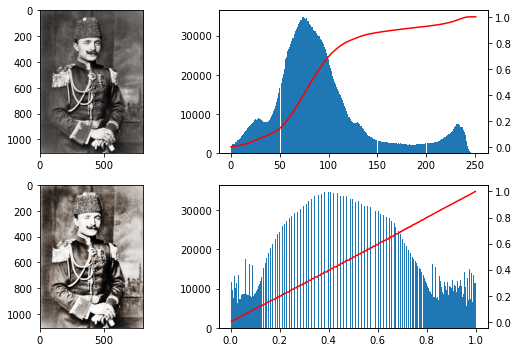

In [14]:
#Enver görüntüsüne histogram eşitleme uygulanır. 
#ve kümülatif histogramı histogramın üstüne yerleştirilir

im = io.imread('enver.jpg')
imh = ex.equalize_hist(im) 
plotImgHistCDF(im, imh)

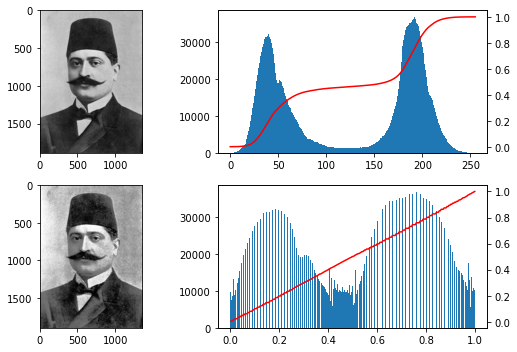

In [15]:
#Talat görüntüsüne histogram eşitleme uygulanır. 
#ve kümülatif histogramı histogramın üstüne yerleştirilir

im = io.imread('talat.jpg')
imh = ex.equalize_hist(im) 
plotImgHistCDF(im, imh)

C:\Users\pc\anaconda3\envs\env\lib\site-packages\skimage\exposure\exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)
C:\Users\pc\anaconda3\envs\env\lib\site-packages\skimage\exposure\exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


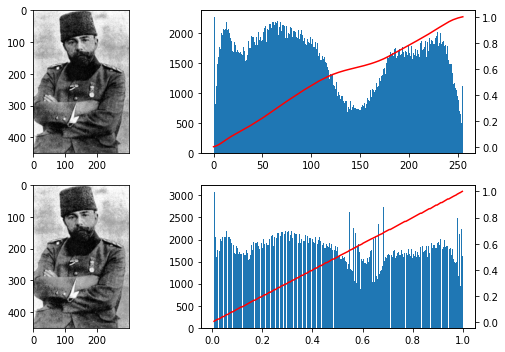

In [16]:
#Cemal görüntüsüne histogram eşitleme uygulanır. 
#ve kümülatif histogramı histogramın üstüne yerleştirilir

im = io.imread('cemal.jpg')
imh = ex.equalize_hist(im) 
plotImgHistCDF(im, imh)

In [17]:
#OpenCV kütüphanesi yüklenir
import cv2

#Renkli İdil resmi gray - gri'ye çevrilir ve oluşturulan grayImage.png dosyasına kaydedilir. 
originalImage = cv2.imread('idil.jpg')
grayImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY)
cv2.imwrite('grayImage.png', grayImage)

True

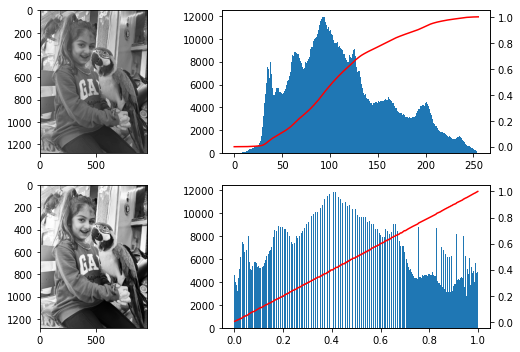

In [18]:
#İdil görüntüsüne histogram eşitleme uygulanır. 
#ve kümülatif histogramı histogramın üstüne yerleştirilir

im = io.imread('grayImage.png')
imh = ex.equalize_hist(im) 
plotImgHistCDF(im, imh)